Khiena Salsabiila Susanty_063_SI 2021 A

#Import Data

In [ ]:
import pandas as pd
import numpy as np
import io

import matplotlib.pyplot as plt
import seaborn as sns

from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
import mlxtend as ml

import warnings
warnings.filterwarnings("ignore", message="should_run_async will not call transform_cell automatically", category=DeprecationWarning)

In [ ]:
# Loading the dataset
from google.colab import drive
drive.mount('/content/drive')

import pandas as pd
df = pd.read_excel('/content/drive/MyDrive/Dataset/Online Retail.xlsx')
print("Jumlah Fitur: ", df.shape[1])

df

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Jumlah Fitur:  8


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France


#Preprocessing

In [ ]:
df.shape

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


(541909, 8)

In [ ]:
df.info()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [ ]:
df.describe()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [ ]:
df.isnull().sum()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [ ]:
df.duplicated().sum()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


5268

In [ ]:
dataclean = df.drop_duplicates()
dataclean.duplicated().sum()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


0

In [ ]:
dataclean.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [ ]:
dataclean.dtypes

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


InvoiceNo              object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
UnitPrice             float64
CustomerID            float64
Country                object
dtype: object

In [ ]:
dataclean['Description'].value_counts().to_dict()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


{'WHITE HANGING HEART T-LIGHT HOLDER': 2357,
 'REGENCY CAKESTAND 3 TIER': 2189,
 'JUMBO BAG RED RETROSPOT': 2156,
 'PARTY BUNTING': 1720,
 'LUNCH BAG RED RETROSPOT': 1625,
 'ASSORTED COLOUR BIRD ORNAMENT': 1488,
 'SET OF 3 CAKE TINS PANTRY DESIGN ': 1465,
 'PACK OF 72 RETROSPOT CAKE CASES': 1367,
 'LUNCH BAG  BLACK SKULL.': 1323,
 'NATURAL SLATE HEART CHALKBOARD ': 1272,
 'POSTAGE': 1252,
 'JUMBO BAG PINK POLKADOT': 1245,
 'HEART OF WICKER SMALL': 1230,
 'JAM MAKING SET WITH JARS': 1221,
 'JUMBO STORAGE BAG SUKI': 1211,
 "PAPER CHAIN KIT 50'S CHRISTMAS ": 1194,
 'JUMBO SHOPPER VINTAGE RED PAISLEY': 1192,
 'LUNCH BAG CARS BLUE': 1185,
 'JAM MAKING SET PRINTED': 1177,
 'LUNCH BAG SPACEBOY DESIGN ': 1177,
 'RECIPE BOX PANTRY YELLOW DESIGN': 1173,
 'SPOTTY BUNTING': 1168,
 'ROSES REGENCY TEACUP AND SAUCER ': 1128,
 'WOODEN PICTURE FRAME WHITE FINISH': 1124,
 'LUNCH BAG PINK POLKADOT': 1121,
 'LUNCH BAG SUKI DESIGN ': 1121,
 'SET OF 4 PANTRY JELLY MOULDS': 1099,
 'ALARM CLOCK BAKELIKE RED '

In [ ]:
counts = dataclean['Description'].value_counts()

percent = dataclean['Description'].value_counts(normalize=True).mul(100).round(1).astype(str) + '%'

top_10 = pd.DataFrame({'counts': counts, '%': percent})

top_10.head(10)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,counts,%
WHITE HANGING HEART T-LIGHT HOLDER,2357,0.4%
REGENCY CAKESTAND 3 TIER,2189,0.4%
JUMBO BAG RED RETROSPOT,2156,0.4%
PARTY BUNTING,1720,0.3%
LUNCH BAG RED RETROSPOT,1625,0.3%
ASSORTED COLOUR BIRD ORNAMENT,1488,0.3%
SET OF 3 CAKE TINS PANTRY DESIGN,1465,0.3%
PACK OF 72 RETROSPOT CAKE CASES,1367,0.3%
LUNCH BAG BLACK SKULL.,1323,0.2%
NATURAL SLATE HEART CHALKBOARD,1272,0.2%


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


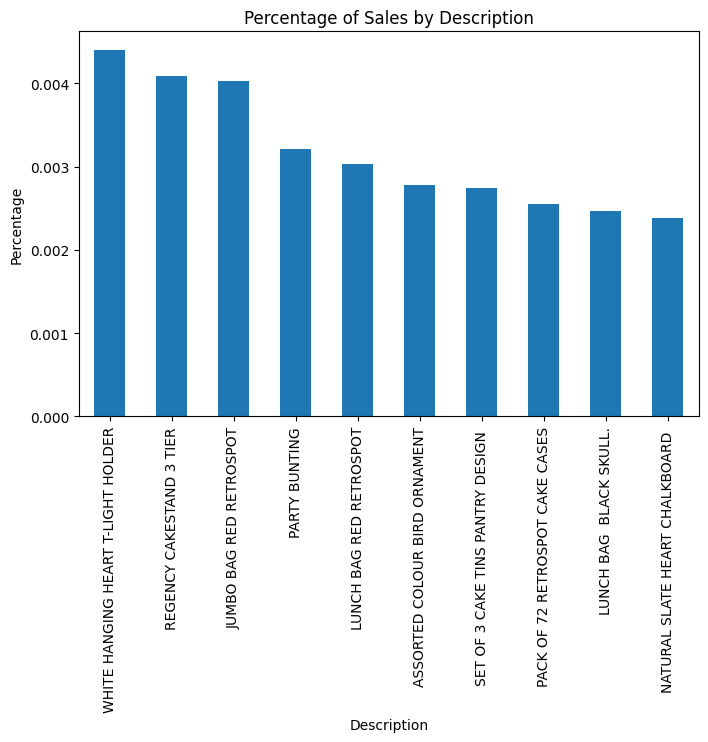

In [ ]:
# Rank by percentage
plt.figure(figsize=(8,5))
dataclean['Description'].value_counts(normalize=True)[:10].plot(kind="bar", title="Percentage of Sales by Description").set(xlabel="Description", ylabel="Percentage")
plt.show()


#Analisis Market Basket

In [ ]:
dataclean_basket = dataclean.groupby(["CustomerID","Description"]).size().reset_index(name="Count")

market_basket = (dataclean_basket.groupby(['CustomerID', 'Description'])['Count'].sum().unstack().reset_index().fillna(0).set_index('CustomerID'))
market_basket.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Description,4 PURPLE FLOCK DINNER CANDLES,50'S CHRISTMAS GIFT BAG LARGE,DOLLY GIRL BEAKER,I LOVE LONDON MINI BACKPACK,I LOVE LONDON MINI RUCKSACK,NINE DRAWER OFFICE TIDY,OVAL WALL MIRROR DIAMANTE,RED SPOT GIFT BAG LARGE,SET 2 TEA TOWELS I LOVE LONDON,SPACEBOY BABY GIFT SET,...,ZINC STAR T-LIGHT HOLDER,ZINC SWEETHEART SOAP DISH,ZINC SWEETHEART WIRE LETTER RACK,ZINC T-LIGHT HOLDER STAR LARGE,ZINC T-LIGHT HOLDER STARS LARGE,ZINC T-LIGHT HOLDER STARS SMALL,ZINC TOP 2 DOOR WOODEN SHELF,ZINC WILLIE WINKIE CANDLE STICK,ZINC WIRE KITCHEN ORGANISER,ZINC WIRE SWEETHEART LETTER TRAY
CustomerID,,,,,,,,,,,,,,,,,,,,,
12346.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12347.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12348.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12349.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12350.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
def encode_data(datapoint):
  if datapoint <= 0:
    return 0
  else:
    return 1

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Process the transformation into the market_basket dataset
market_basket = market_basket.applymap(encode_data)

# Check the result
market_basket.head()

market_basket.isna().sum()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Description
 4 PURPLE FLOCK DINNER CANDLES      0
 50'S CHRISTMAS GIFT BAG LARGE      0
 DOLLY GIRL BEAKER                  0
 I LOVE LONDON MINI BACKPACK        0
 I LOVE LONDON MINI RUCKSACK        0
                                   ..
ZINC T-LIGHT HOLDER STARS SMALL     0
ZINC TOP  2 DOOR WOODEN SHELF       0
ZINC WILLIE WINKIE  CANDLE STICK    0
ZINC WIRE KITCHEN ORGANISER         0
ZINC WIRE SWEETHEART LETTER TRAY    0
Length: 3896, dtype: int64

#Algoritma Apriori

In [ ]:
itemsets = apriori(market_basket, min_support= 0.04, use_colnames=True)
rules = association_rules(itemsets, metric='lift', min_threshold=0.7)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/mlxtend/frequent_patterns/fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


In [ ]:
rules.sort_values("lift", ascending = False, inplace = True)
rules.head(10)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
391,(POPPY'S PLAYHOUSE KITCHEN),(POPPY'S PLAYHOUSE BEDROOM ),0.053294,0.049405,0.041171,0.772532,15.636624,0.038538,4.179030,0.988741
390,(POPPY'S PLAYHOUSE BEDROOM ),(POPPY'S PLAYHOUSE KITCHEN),0.049405,0.053294,0.041171,0.833333,15.636624,0.038538,5.680238,0.984697
31,(BLUE HAPPY BIRTHDAY BUNTING),(PINK HAPPY BIRTHDAY BUNTING),0.052150,0.054437,0.044145,0.846491,15.549830,0.041306,6.159665,0.987172
30,(PINK HAPPY BIRTHDAY BUNTING),(BLUE HAPPY BIRTHDAY BUNTING),0.054437,0.052150,0.044145,0.810924,15.549830,0.041306,5.013073,0.989560
708,"(GREEN REGENCY TEACUP AND SAUCER, REGENCY CAKE...","(PINK REGENCY TEACUP AND SAUCER, ROSES REGENCY...",0.068618,0.062443,0.051693,0.753333,12.064371,0.047408,3.800907,0.984678
705,"(PINK REGENCY TEACUP AND SAUCER, ROSES REGENCY...","(GREEN REGENCY TEACUP AND SAUCER, REGENCY CAKE...",0.062443,0.068618,0.051693,0.827839,12.064371,0.047408,5.409939,0.978192
710,(PINK REGENCY TEACUP AND SAUCER),"(GREEN REGENCY TEACUP AND SAUCER, ROSES REGENC...",0.073422,0.059927,0.051693,0.704050,11.748496,0.047293,3.176458,0.987378
703,"(GREEN REGENCY TEACUP AND SAUCER, ROSES REGENC...",(PINK REGENCY TEACUP AND SAUCER),0.059927,0.073422,0.051693,0.862595,11.748496,0.047293,6.743430,0.973204
707,"(GREEN REGENCY TEACUP AND SAUCER, ROSES REGENC...","(PINK REGENCY TEACUP AND SAUCER, REGENCY CAKES...",0.074108,0.059698,0.051693,0.697531,11.684310,0.047268,3.108753,0.987604
706,"(PINK REGENCY TEACUP AND SAUCER, REGENCY CAKES...","(GREEN REGENCY TEACUP AND SAUCER, ROSES REGENC...",0.059698,0.074108,0.051693,0.865900,11.684310,0.047268,6.904509,0.972470


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


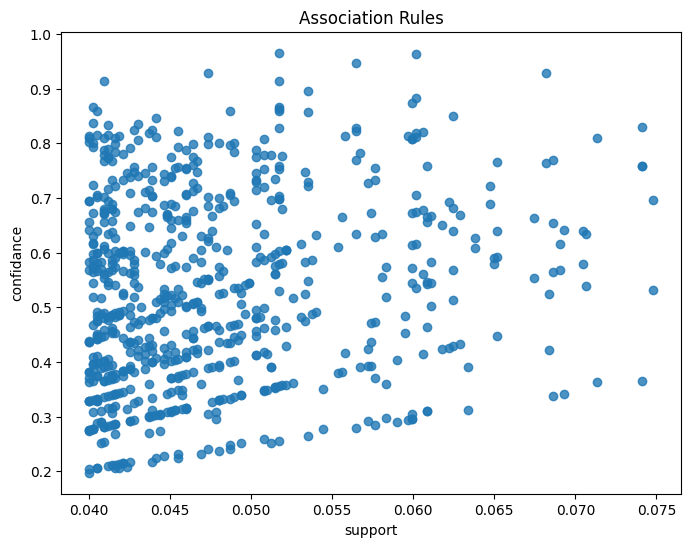

In [ ]:
support = rules.support.to_numpy()
confidence = rules.confidence.to_numpy()

for i in range (len(support)):
    support[i] = support[i]
    confidence[i] = confidence[i]

plt.figure(figsize=(8,6))
plt.title('Association Rules')
plt.xlabel('support')
plt.ylabel('confidance')
sns.regplot(x=support, y=confidence, fit_reg=False)
plt.show()

#Rekomendasi

In [ ]:
# Recommendation of Market Basket
rec_rules = rules[ (rules['lift'] > 1) & (rules['confidence'] >= 0.7) ]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
cols_keep = {'antecedents':'item_1', 'consequents':'item_2', 'support':'support', 'confidence':'confidence', 'lift':'lift'}
cols_drop = ['antecedent support', 'consequent support', 'leverage', 'conviction']

recommendation_basket = pd.DataFrame(rec_rules).rename(columns= cols_keep).drop(columns=cols_drop).sort_values(by=['lift'], ascending = False)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
display(recommendation_basket)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,item_1,item_2,support,confidence,lift,zhangs_metric
391,(POPPY'S PLAYHOUSE KITCHEN),(POPPY'S PLAYHOUSE BEDROOM ),0.041171,0.772532,15.636624,0.988741
390,(POPPY'S PLAYHOUSE BEDROOM ),(POPPY'S PLAYHOUSE KITCHEN),0.041171,0.833333,15.636624,0.984697
31,(BLUE HAPPY BIRTHDAY BUNTING),(PINK HAPPY BIRTHDAY BUNTING),0.044145,0.846491,15.549830,0.987172
30,(PINK HAPPY BIRTHDAY BUNTING),(BLUE HAPPY BIRTHDAY BUNTING),0.044145,0.810924,15.549830,0.989560
708,"(GREEN REGENCY TEACUP AND SAUCER, REGENCY CAKE...","(PINK REGENCY TEACUP AND SAUCER, ROSES REGENCY...",0.051693,0.753333,12.064371,0.984678
...,...,...,...,...,...,...
400,(REGENCY TEA PLATE ROSES ),(REGENCY CAKESTAND 3 TIER),0.041857,0.813333,4.008899,0.791277
380,(PINK REGENCY TEACUP AND SAUCER),(REGENCY CAKESTAND 3 TIER),0.059698,0.813084,4.007671,0.809946
472,"(GREEN REGENCY TEACUP AND SAUCER, ROSES REGENC...",(REGENCY CAKESTAND 3 TIER),0.059927,0.808642,3.985775,0.809066
58,(GREEN REGENCY TEACUP AND SAUCER),(REGENCY CAKESTAND 3 TIER),0.068618,0.769231,3.791519,0.808363
